### Before you start, make sure you have the following packages:

### Packages used in this notebook:
1. astropy -- unit conversions, fits data access, image processing
2. matplotlib -- data visualization

### Packages not used in this notebook, but are great to have:
1. numpy -- data analysis
2. scipy -- data analysis
3. pandas -- data storage, management
4. skimage -- image processing, data visualization
5. ...

# 1. Import Packages

In [1]:
import numpy as np
import astropy.units as u
from astropy.wcs import WCS
from astropy.io import fits
import matplotlib as mpl
import matplotlib.pyplot as plt

# 2. Open `.fits` File

In [8]:
# open fits file
hdu_galaxy = fits.open('/Users/pathak.89/Downloads/background_comps/ngc1365_irac4_atGauss4.fits')[0]

# set up coordinate grid for data in fits file
wcs_im = WCS(hdu_galaxy.header)

# 3. Access `.fits` Header

In [14]:
# here's what the header looks like
# this is the best place to confirm what the units are how your data was processed
hdu_galaxy.header

SIMPLE  =                    T / Written by IDL:  Wed Jul  5 10:49:16 2023      
BITPIX  =                  -32 /bits per data value                             
NAXIS   =                    2 /number of axes                                  
NAXIS1  =                 3179 /                                                
NAXIS2  =                 2681 /                                                
EXTEND  =                    T /file may contain extensions                     
ORIGIN  = 'Spitzer Super-Mosaic Pipeline' / Origin of these image data          
CREATOR = 'Spitzer Science Center' / Creator of this FITS file                  
                                                                                
          / TIME AND EXPOSURE INFORMATION                                       
                                                                                
TELESCOP= 'Spitzer '           / Name of Telescope                              
INSTRUME= 'IRAC    '        

# 4. Display `.fits` Image

Use `matplotlib.pyplot.imshow` to display data. 

`imshow` documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html

I include some code below to quickly format the figure to my personal tastes. Feel free to play around with this code, check out the documentation pages, and add your own variations :)

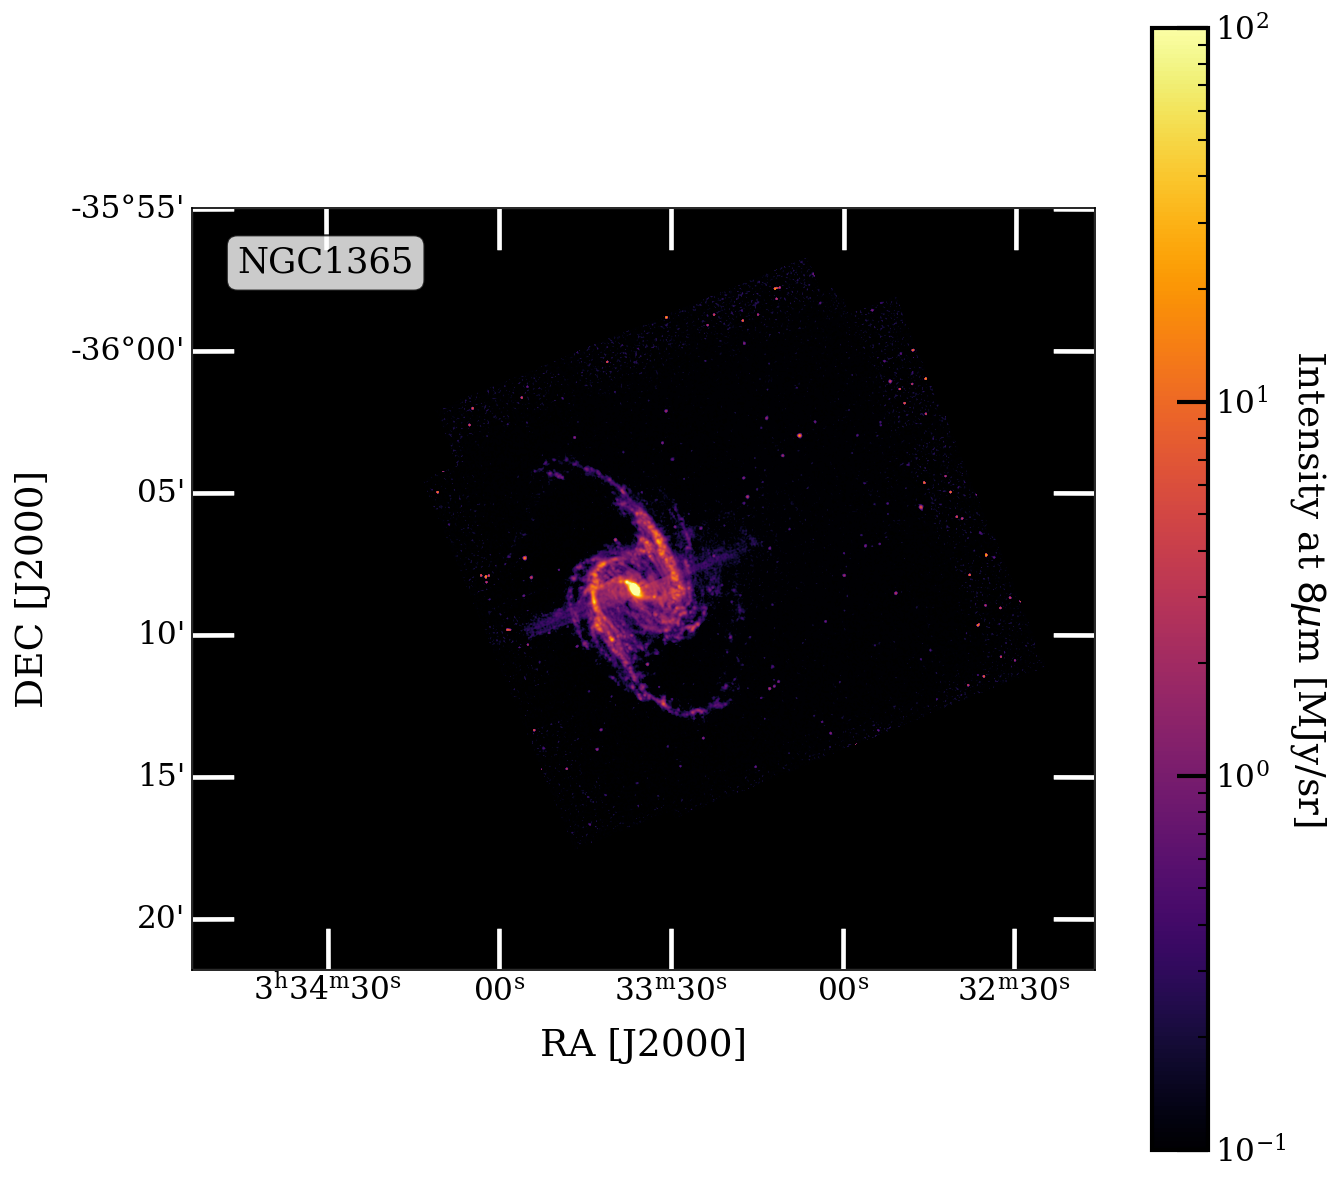

In [36]:
# start a figure
f = plt.figure(figsize=(8, 8))
# set up a subplot with coordinate information from fits file header
ax = plt.subplot(projection=wcs_im)

# display fits image
im = ax.imshow(hdu_galaxy.data, origin='lower', norm=mpl.colors.LogNorm(vmin=1e-1, vmax=1e2), aspect='equal', cmap='inferno', alpha=1)

# everything that comes after this point is to make the figure look prettier; 
# strictly speaking, these aren't necessary
plt.rcParams["font.family"] = "serif"
mpl.rcParams['text.usetex'] = False

f.set_dpi(150)
f.set_facecolor('w')
ax.set_facecolor('k')
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
ax.text(0.05, 0.95, 'NGC1365', transform=ax.transAxes, fontsize=17,
                verticalalignment='top', bbox=props, zorder=11)
ax.set_xlabel('RA [J2000]', fontsize=18)
ax.set_ylabel('DEC [J2000]', fontsize=18)
ax.tick_params(axis='both', which='major', direction='in', color='white', length=20, width=2, labelsize=15)

# set up colorbar
cmap = mpl.cm.inferno
normalize = mpl.colors.LogNorm(vmin=1e-1, vmax=1e2)
cbar = f.colorbar(im, ax=ax)
cbar.set_label('Intensity at $8 \mu$m [MJy/sr]', rotation=270, fontsize=18, labelpad=20)
cbar.ax.tick_params(direction='in', which='both', labelsize=15)
cbar.ax.tick_params(which='major', length=15, width=2)
cbar.ax.tick_params(which='minor', length=5, width=1)
plt.setp(cbar.ax.spines.values(), linewidth=2)

f.tight_layout()
